# Capstone Project - The Battle of Neighborhoods (Week 2)

___
# AIR CONTAMINATION IN CALIFORNIA
___

# INTRODUCTION

During the last couple of decades, California has been a leader state in air pollution, with high ozone levels. Most of the cities in California state report days of unhealhy air quality [1], and more than ninety percent of Californians live in counties with unhealthy air[2].
Though a lot of effort has been put into addressing this problem and some advances have been achieved, air pollution represents an unmet public need which dates back to 1943 [3]. 
Poor air quality has a direct influence in health, having a myriad of effects influencing the nervous system [4], lungs[5], cardiovascular system[3, 6] (among others), and increases the risk of all-cause mortality [7]. Consequently, more efficient strategies should be developed to mitigate air pollution.

The objective of this project was to analyze California cities contamination and determine whether the percentaje of parks and green areas (relative to all venues in each city) had a relation with the air quality data. 
In order to perform a more complete analysis, cities will be clustered according to air quality index information and the relation between percentaje of parks/green areas and air pollution will be studied within each cluster.

Since it has been demonstrated that population density has both benefits and costs for air quality [8], agglomeration will also be considered in the analysis. 

For this purpose, air quality data will be retrieved from the United States Environmental Protection Agency (US EPA) [1], and California demographic data will be obtained from Wikipedia [9, 10] and kaggle [11]. 
After cleaning and preparing the data, cities will be clustered according to their air quality index, and correlation analysis will be performed within each cluster.

It is expected that the results derived from this study could be of general public interest. If a positive correlation existed between the number of parks and air quality, irrespective of population density in each cluster, then it could be speculated that parks could mitigate air contamination and therefore city planning should consider the development of parks and green areas in the future.


_________
# METHODOLOGY
_________
The objective of this project was to analyze California cities contamination and determine whether the percentaje of parks (relative to all venues in each city) within each cluster had a relation with the air quality data.

As mentioned before, this information comes from the United States Environmental Protection Agency (US EPA), Wikipedia and kaggle. 

After cleaning and preparing the data, cities will be clustered according to their air quality index, and correlation analysis will be performed within each cluster.

**<span style="text-decoration: underline">Data collection</span>** 

* part 1= californian cities population density data
* part 2= californian cities latitude and longitude data
* part 3= air quality data

* part 4= final dataframe and preliminar analysis

* part 5= California cities venues data

## _1A- California cities population data_

California cities population data was imported from Wikipedia [100 most populated cities]. The data was collected as a dataframe.

_Import packages_

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

_URL, Request and Response_

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_largest_California_cities_by_population"
r = requests.Session()
response= r.get(url, timeout=10)
response

<Response [200]>

_Wrangling HTML With BeautifulSoup_

In [3]:
soup = BeautifulSoup(response.content, 'html.parser')

_Title of HTML Table_

In [4]:
title=soup.title.string
title

'List of largest California cities by population - Wikipedia'

In [5]:
California_table=soup.find('table',{'class':'wikitable sortable'})
for row in California_table.findAll("tr"):
    cells = row.findAll('td')
print('Data description \n* number of columns:', len(cells)) #number of cols

rows = California_table.findAll("tr")
print('* number of rows:', len(rows)) #number of rows

Data description 
* number of columns: 6
* number of rows: 101


_Get header_

In [6]:
header = [th.text.rstrip() for th in rows[0].find_all('th')]
print(header)

['2019\xa0Rank[1]', 'City', 'Population(2019\xa0est.)[1]', 'County', 'Image', 'Description']


_Get tabular data_

In [7]:
first_data_raw=1

lst_data_raw=[]
for row in rows[first_data_raw:]:
    tds = row.select('td')
    code = tds[0]
    data = [code.text.rstrip()]
    data.extend([d.text.rstrip() for d in tds[1:]])
    lst_data_raw.append(data)


_Create dictionary_

In [8]:
datax = list(zip(*lst_data_raw))
dat = dict(zip(header, datax))

_Create data frame and get city+population_

In [9]:
df = pd.DataFrame(dat)

In [10]:
df0= df[['City','Population(2019\xa0est.)[1]']]

_Rename column "population"_

In [11]:
df0 = df0.rename(columns={'Population(2019\xa0est.)[1]': 'Population'})
df0.head()


,City,Population
0,Los Angeles,"3,979,519"
1,San Diego,"1,423,851"
2,San Jose,"1,021,795"
3,San Francisco,"881,549"
4,Fresno,"531,576"


_Check cleaned data frame shape_

In [12]:
df0.shape

(100, 2)

## _1B- California cities total area data (25 largest)_

California cities land area data was imported from Wikipedia [25 largest cities] in order to calculate population _density_, since population alone might not represent faithfully cities size and transit (which might be more related to contamination). The data was collected as explained before and obtained as a dataframe.

_URL, Request and Response_

In [13]:
url2 = "https://en.wikipedia.org/wiki/List_of_largest_California_cities_by_land_area"
r = requests.Session()
response= r.get(url2, timeout=10)
response

<Response [200]>

In [14]:
soup1 = BeautifulSoup(response.content, 'html.parser')

_Table title_

In [15]:
title=soup1.title.string
title

'List of largest California cities by land area - Wikipedia'

_Build dataframe_

In [16]:
land=soup1.find('table',{'class':'wikitable sortable'})
for row in land.findAll("tr"):
    cells = row.findAll('td')
print('Data description \n* number of columns:', len(cells)) #number of cols

rows = land.findAll("tr")
print('* number of rows:', len(rows)) #number of rows

Data description 
* number of columns: 7
* number of rows: 26


In [17]:
headerL = [th.text.rstrip() for th in rows[0].find_all('th')]
print('header:', headerL)

header: ['Rank', 'City', 'Land area', 'Water area', 'Total area', 'Population (2010)[1]', 'Population Density']


In [18]:
data_raw=1

st_data_raw=[]
for row in rows[data_raw:]:
    tds = row.select('td')
    code = tds[0]
    data = [code.text.rstrip()]
    data.extend([d.text.rstrip() for d in tds[1:]])
    st_data_raw.append(data)


In [19]:
dattax = list(zip(*st_data_raw))
datt = dict(zip(headerL, dattax))

In [20]:
dframe = pd.DataFrame(datt)

In [21]:
dframe=dframe[['City','Land area']]

In [22]:
dframe.shape

(25, 2)

# _1C- Population density calculation_

The dataframes containing population and area data for each city in California were merged as a new dataframe, in order to calculate population density

In [23]:
df00=pd.merge(df0,dframe,on='City', how='inner')

In [24]:
df00.shape

(20, 3)

_regex was used to clean **Land area** column data (necessary for later calculations), and to transform **Population** data as float type_

In [25]:
df00["Land_area_sq_mi_"] = df00['Land area'].str.extract("(\d*\.?\d+)", expand=True)

In [26]:
df00=df00[['City','Population','Land_area_sq_mi_']]

In [27]:
df00.head()

,City,Population,Land_area_sq_mi_
0,Los Angeles,"3,979,519",468.7
1,San Diego,"1,423,851",325.2
2,San Jose,"1,021,795",176.5
3,Fresno,"531,576",111.9
4,Sacramento,"513,624",97.9


In [28]:
import re    

df00['Population'] = pd.to_numeric(df00['Population'].apply(lambda x: re.sub(',', '', str(x))))


_Data was transformed to float type_

In [29]:
df00['Population'] = df00.Population.astype(float)
df00['Land_area_sq_mi_'] = df00.Land_area_sq_mi_.astype(float)

_New column where population density was calculated (total population / land area):_

In [30]:
df00["Population density"] = df00['Population']/df00['Land_area_sq_mi_']

In [31]:
df00.head()

,City,Population,Land_area_sq_mi_,Population density
0,Los Angeles,3979519.0,468.7,8490.546192
1,San Diego,1423851.0,325.2,4378.385609
2,San Jose,1021795.0,176.5,5789.206799
3,Fresno,531576.0,111.9,4750.455764
4,Sacramento,513624.0,97.9,5246.414709


_Since not all the data contained in the df00 dataframe was necessary, "df1" with the **city** and **population_density** columns was created_

In [32]:
df1=df00[['City','Population density']]
df1.head()

,City,Population density
0,Los Angeles,8490.546192
1,San Diego,4378.385609
2,San Jose,5789.206799
3,Fresno,4750.455764
4,Sacramento,5246.414709


## _2- Latitude and Longitude data_

In order to draw each city in a California map and to get cities venues, latitude and longitude data was dowloaded from the url mentioned next. Then, data was cleaned and merged to the Population density dataframe ("df1") in a new dataframe called "new_df".

_download latitude and longitude data_

In [33]:
#data was downloaded from https://www.kaggle.com/camnugent/california-housing-feature-engineering?select=cal_cities_lat_long.csv

df_gps= pd.read_csv('/Users/FR/Desktop/California_latlong.csv', sep=';') # path
df_gps.head()

,Location,Latitude,Longitude
0,Acalanes Ridge,37.90,-122.08
1,Acampo,38.17,-121.28
2,Acton,34.50,-118.19
3,Adelanto city,34.59,-117.44
4,Adin,41.20,-120.95


_Remove "city" or "City" from Cities names_

_The **Location** column indicated cities names where the word "city" or "City" was in some of the rows. Since this lat/long data will be appended to the cities population density dataframe using inner join on "City" column, it was absolutly necessary that cities were named the same in both dataframes (the ones to be merged), ir order to avoid losing important data_

In [34]:
gps=df_gps.replace(' city','', regex=True).replace(' City','', regex=True)
gps.head()

,Location,Latitude,Longitude
0,Acalanes Ridge,37.90,-122.08
1,Acampo,38.17,-121.28
2,Acton,34.50,-118.19
3,Adelanto,34.59,-117.44
4,Adin,41.20,-120.95


In [35]:
dataframe=df1.replace(' city','', regex=True).replace(' City','', regex=True)

In [36]:
dataframe.head()

,City,Population density
0,Los Angeles,8490.546192
1,San Diego,4378.385609
2,San Jose,5789.206799
3,Fresno,4750.455764
4,Sacramento,5246.414709


_Change 'Location' to 'City' in gps dataframe_

In [37]:
gps1= gps.rename(columns={'Location': 'City'})

### Intermediate DF
_Merge dataframes: a new dataframe named "new_df" that contains Cities names, population density and lat/long data is created_

In [38]:
new_df=pd.merge(gps1,dataframe,on='City', how='inner')

In [39]:
#Check cities
Cities=[]
for row in new_df['City']:
    Cities.append(row)
print(Cities)

['Bakersfield', 'Fremont', 'Fresno', 'Hesperia', 'Irvine', 'Lancaster', 'Los Angeles', 'Moreno Valley', 'Oakland', 'Palmdale', 'Redding', 'Riverside', 'Sacramento', 'San Bernardino', 'San Diego', 'San Jose', 'Santa Clarita', 'Stockton', 'Thousand Oaks', 'Victorville']


In [40]:
new_df.shape

(20, 4)

In [41]:
new_df.head()

,City,Latitude,Longitude,Population density
0,Bakersfield,35.35,-119.03,2565.584719
1,Fremont,37.52,-122.00,3111.096774
2,Fresno,36.78,-119.79,4750.455764
3,Hesperia,34.40,-117.31,1309.849521
4,Irvine,33.68,-117.77,4347.972769


## _3- Air Quality Index Data_

California Air Quality data (AQI) was downloaded from United States Environmental Protection Agency (US EPA). 

The data corresponds to the number of days where air quality was considered Good(G), Moderate(M), Unhealthy for sensitive groups(USG), unhealhy(U) or Very unhealthy(VU) according to US EPA standards. 
__________

_**California** Air Quality Index Data_

_data cleaning: All the cities in the US EPA database had **', CA'** after the name. As explained before, it is necessary to unify criteria for cities names. Hence, **', CA'** was removed from the AQI dataframe_


In [42]:
#https://www.epa.gov/outdoor-air-quality-data/air-quality-index-report

dfAQ= pd.read_csv('/Users/FR/Desktop/aqireport2019.csv', sep=',') #path
dfAQ1=dfAQ.replace(', CA','', regex=True)

_Air Quality dataframe contained more data than necessary for this analysis, so ".iloc" was used to get data from columns 1 to 7_

In [43]:
dfAQ2 = dfAQ1.iloc[:, 1:8].copy()

_Change columns names (just because it's simplier to work with smaller names)_

In [44]:
dfAQ2 = dfAQ2.rename(columns={'Good': 'G'})
dfAQ2 = dfAQ2.rename(columns={'Moderate': 'M'})
dfAQ2 = dfAQ2.rename(columns={'Unhealthy for Sensitive Groups': 'USG'})
dfAQ2 = dfAQ2.rename(columns={'Unhealthy': 'U'})
dfAQ2 = dfAQ2.rename(columns={'Very Unhealthy': 'VU'})


**_prearing data: transform "·" to zeros_**

In [45]:
dfAQ2.loc[dfAQ2.G == ".", 'G'] = int(0)
dfAQ2.loc[dfAQ2.M == ".", 'M'] = int(0)
dfAQ2.loc[dfAQ2.USG == ".", 'USG'] = int(0)
dfAQ2.loc[dfAQ2.U == ".", 'U'] = int(0)
dfAQ2.loc[dfAQ2.VU == ".", 'VU'] = int(0)


**_prearing data: transform data to int type (needed to perform calculations)_**

In [46]:
dfAQ2['G'] = dfAQ2.G.astype(int)
dfAQ2['M'] = dfAQ2.M.astype(int)
dfAQ2['U'] = dfAQ2.U.astype(int)
dfAQ2['VU'] = dfAQ2.VU.astype(int)
dfAQ2['USG'] = dfAQ2.USG.astype(int)
# dfAQ2.dtypes #to check types

**_prearing data: Calculate percentaje of Good (G), Moderate (M), Unhealty (U), Very Unhealthy (VU) and Unhealty to sensitive groups (USG) data (relative to the number of days with available data), for each city in california_**

In [47]:
dfAQ2['G%'] = dfAQ2['G']/dfAQ2['# Days with AQI']
dfAQ2['M%'] = dfAQ2['M']/dfAQ2['# Days with AQI']
dfAQ2['USG%'] = dfAQ2['USG']/dfAQ2['# Days with AQI']
dfAQ2['U%'] = dfAQ2['U']/dfAQ2['# Days with AQI']
dfAQ2['VU%'] = dfAQ2['VU']/dfAQ2['# Days with AQI']

AQI = dfAQ2[['CBSA','G%', 'M%', 'USG%', 'U%', 'VU%']]
AQI=AQI.replace('--','-', regex=True)


## _4- Final data frame_

_Merge Air Quality data to cities dataframe that contain population density and Lat/long data (new_df)_

In [48]:
# duplicate data for grouped cities (in air quality data)
AQI2=AQI.assign(CBSA = AQI['CBSA'].str.split('-')).explode('CBSA').reset_index(drop=True)
AQI2 = AQI2.rename(columns={'CBSA': 'City'})

In [49]:
final_df=pd.merge(new_df,AQI2,on='City', how='inner')

In [50]:
final_df.shape

(12, 9)

In [51]:
final_df

,City,Latitude,Longitude,Population density,G%,M%,USG%,U%,VU%
0,Bakersfield,35.35,-119.03,2565.584719,0.326027,0.413699,0.238356,0.016438,0.005479
1,Fresno,36.78,-119.79,4750.455764,0.380822,0.438356,0.175342,0.005479,0.000000
2,Los Angeles,34.11,-118.41,8490.546192,0.180822,0.569863,0.169863,0.076712,0.002740
3,Oakland,37.77,-122.22,7760.412186,0.695890,0.279452,0.024658,0.000000,0.000000
4,Redding,40.57,-122.37,1553.523490,0.854396,0.145604,0.000000,0.000000,0.000000
5,Riverside,33.94,-117.39,4085.819975,0.115068,0.487671,0.216438,0.158904,0.021918
6,Sacramento,38.57,-121.47,5246.414709,0.471233,0.471233,0.057534,0.000000,0.000000
7,San Bernardino,34.14,-117.30,3645.000000,0.115068,0.487671,0.216438,0.158904,0.021918
8,San Diego,32.82,-117.13,4378.385609,0.238356,0.693151,0.063014,0.005479,0.000000
9,San Jose,37.30,-121.85,5789.206799,0.720548,0.268493,0.010959,0.000000,0.000000


____________
Plot relation between population density and each category for air quality (scatter plot)

In [52]:
plt_X= final_df['Population density']
plt_G= final_df['G%']
plt_M= final_df['M%']
plt_U= final_df['U%']
plt_VU= final_df['VU%']
plt_USG= final_df['USG%']


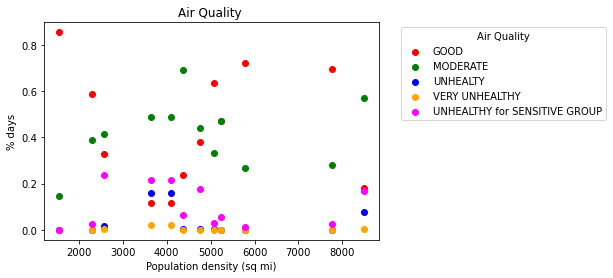

In [53]:
pG=plt.scatter(plt_X,plt_G, color="red", label= 'GOOD')
pM=plt.scatter(plt_X, plt_M, color="green", label= 'MODERATE')
pU=plt.scatter(plt_X, plt_U, color="blue", label= 'UNHEALTY')
pVU=plt.scatter(plt_X, plt_VU, color="orange", label= 'VERY UNHEALTHY')
pUSG=plt.scatter(plt_X, plt_USG, color="magenta", label= 'UNHEALTHY for SENSITIVE GROUP')


plt.xlabel('Population density (sq mi)')
plt.ylabel('% days')
plt.title("Air Quality ")
plt.legend(handles=[pG, pM, pU, pVU, pUSG], title='Air Quality', bbox_to_anchor=(1.05, 1), loc='upper left')

#### Unexpectedly, there does not seem to be a correlation between % of good days (or the other categories) and population density. 
#### % of Moderate days is the only category for which there seems to be a positive relation between air quality and population density, but only between 0 - 4500/sq mi. 
### Therefore, population density will be excluded from the clustering analysis

-----------

# _5- California venues_

_import libraries_

In [54]:
import numpy as np
import json 
from geopy.geocoders import Nominatim 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium 

_Get the latitude and longitude values of California._

In [55]:
address = 'California, US'

geolocator = Nominatim(user_agent="california_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of California are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of California are 36.7014631, -118.755997.


_Create a map of California with cities superimposed on top **(only cities in the final DF)**_

In [56]:
map_california = folium.Map(location=[latitude, longitude], zoom_start=6)

# add markers to map
for lat, lng, City in zip(final_df['Latitude'], final_df['Longitude'],final_df['City']):
    label = '{}'.format(City)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='red',
        fill_opacity=0.5,
        parse_html=False).add_to(map_california)  
    
map_california

_Define Foursquare Credentials and Version_

In [88]:
CLIENT_ID = '-----' # were removed for privacy
CLIENT_SECRET = '-----' # were removed for privacy
VERSION = '20180605' 
LIMIT = 500

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: -----
CLIENT_SECRET:-----


_Function to get nearby venues_

In [58]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
 
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

_California venues dataframe_

In [59]:
California_venues = getNearbyVenues(names=final_df['City'],
                                   latitudes=final_df['Latitude'],
                                   longitudes=final_df['Longitude'])

In [60]:
analyzed_cities=California_venues['City'].unique()
analyzed_cities

array(['Bakersfield', 'Fresno', 'Los Angeles', 'Oakland', 'Redding',
       'Riverside', 'Sacramento', 'San Bernardino', 'San Diego',
       'San Jose', 'Stockton', 'Thousand Oaks'], dtype=object)

_Number of venues in California final_df, grouped by City_

In [61]:
California_venues.groupby('City').count()
print('There are {} uniques categories.'.format(len(California_venues['Venue Category'].unique())))

There are 76 uniques categories.


_New data frame with the different venue categories as columns, and rows=cities **GROUPED BY CITY**_

In [62]:
cal_onehot = pd.get_dummies(California_venues[['Venue Category']], prefix="", prefix_sep="")
cal_onehot['City'] = California_venues['City'] 
fixed_columns = [cal_onehot.columns[-1]] + list(cal_onehot.columns[:-1])
cal_onehot = cal_onehot[fixed_columns]
cal_grouped = cal_onehot.groupby('City').mean().reset_index() ### grouped by city

In [63]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

_new dataframe with the top 10 venues for each City (sorted in descending order)_

In [64]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
cities_venues_sorted = pd.DataFrame(columns=columns)
cities_venues_sorted['City'] = cal_grouped['City']

for ind in np.arange(cal_grouped.shape[0]):
    cities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cal_grouped.iloc[ind, :], num_top_venues)

cities_venues_sorted

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bakersfield,Health & Beauty Service,Mexican Restaurant,Pizza Place,Hot Dog Joint,Gym / Fitness Center,Grocery Store,Gastropub,Gas Station,Gymnastics Gym,Furniture / Home Store
1,Fresno,Mexican Restaurant,Mobile Phone Shop,Chinese Restaurant,Hardware Store,Fast Food Restaurant,Cosmetics Shop,Pizza Place,Coffee Shop,Donut Shop,Sandwich Place
2,Los Angeles,Playground,Trail,Fast Food Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Donut Shop,Falafel Restaurant
3,Oakland,Mexican Restaurant,Café,Furniture / Home Store,Yoga Studio,Gymnastics Gym,Intersection,Gym / Fitness Center,Grocery Store,Gas Station,Fast Food Restaurant
4,Redding,American Restaurant,Pizza Place,Burrito Place,Rental Car Location,Dessert Shop,Sushi Restaurant,Storage Facility,Automotive Shop,Gas Station,Sports Bar
5,Riverside,Convenience Store,Video Store,Comic Shop,Fast Food Restaurant,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Donut Shop,Falafel Restaurant
6,Sacramento,Coffee Shop,Mexican Restaurant,Sushi Restaurant,Burger Joint,Italian Restaurant,Hotel,Gym / Fitness Center,Modern European Restaurant,Mobile Phone Shop,Lounge
7,San Bernardino,Fried Chicken Joint,Convenience Store,Mexican Restaurant,Burger Joint,Fast Food Restaurant,Yoga Studio,Deli / Bodega,Dessert Shop,Diner,Donut Shop
8,San Diego,Dance Studio,Deli / Bodega,Clothing Store,Cajun / Creole Restaurant,Cycle Studio,Dessert Shop,Diner,Donut Shop,Falafel Restaurant,Fast Food Restaurant
9,San Jose,Athletics & Sports,Plaza,Kids Store,Mexican Restaurant,Yoga Studio,Fast Food Restaurant,Deli / Bodega,Dessert Shop,Diner,Donut Shop


_list of different venues_

In [65]:
Venues=[]
for row in California_venues['Venue Category']:
    Venues.append(row)
print(Venues)

['Hot Dog Joint', 'Pizza Place', 'Mexican Restaurant', 'Health & Beauty Service', 'Coffee Shop', 'Mexican Restaurant', 'Burger Joint', 'Movie Theater', 'Breakfast Spot', 'Mexican Restaurant', 'Fried Chicken Joint', 'Cosmetics Shop', 'Mobile Phone Shop', 'Chinese Restaurant', 'Mobile Phone Shop', 'Shopping Mall', 'Chinese Restaurant', 'Fast Food Restaurant', 'Steakhouse', 'Donut Shop', 'Pizza Place', 'Hardware Store', 'Sandwich Place', 'Mexican Restaurant', 'Playground', 'Trail', 'Mexican Restaurant', 'Vegetarian / Vegan Restaurant', 'Yoga Studio', 'Mexican Restaurant', 'Mexican Restaurant', 'Grocery Store', 'Mexican Restaurant', 'Gym / Fitness Center', 'Thai Restaurant', 'Hardware Store', 'Intersection', 'Furniture / Home Store', 'Gas Station', 'Furniture / Home Store', 'Fast Food Restaurant', 'Gymnastics Gym', 'Café', 'Café', 'Sushi Restaurant', 'American Restaurant', 'Storage Facility', 'Pizza Place', 'Pizza Place', 'Rental Car Location', 'Automotive Shop', 'Gas Station', 'Mexican Re

----------------

# RESULTS

Before analyzing the data, cities in California state were clustered according to ther air quality characteristics. AQI DATAFRAME was used for k-means clustering (AQI=Air Quality Index). This dataframe **does not** include population density data

_Firstly k selection was performed for k-means clustering, using Elbow method (the optimum k value is when the curve changes its shape_

In [66]:
aqi_k_df= final_df[['City','G%','M%','USG%','U%','VU%']].copy()
aqi_k_df=aqi_k_df.loc[aqi_k_df['City'].isin(analyzed_cities)]
aqi_k_df.reset_index(drop=True, inplace=True)

_Calculation of Sum of Squared Distances_

In [67]:
aqi_k_df1 = aqi_k_df.drop('City', 1)
Sum_of_squared_distances = []
K = range(1,12)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(aqi_k_df1)
    Sum_of_squared_distances.append(km.inertia_)

_SSD plot_

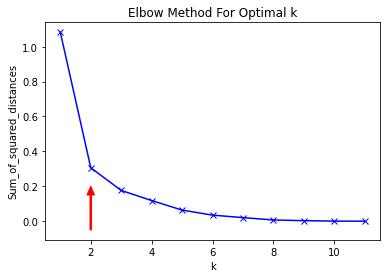

In [68]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.arrow(2, -0.05, 0, 0.2, width=0.05, head_width=0.25, head_length=0.05, shape='full', color='red')
plt.show()

***k selected for analysis= 2** (marked in red)

In [69]:
# set number of clusters
kclusters = 2
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(aqi_k_df1)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0], dtype=int32)

_New dataframe that includes the cluster id as well as the top 10 venues for each neighborhood_

In [70]:
final=final_df.loc[final_df['City'].isin(analyzed_cities)]
final.reset_index(drop=True, inplace=True)


In [71]:
# add clustering labels
cities_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
california_merged = final

# merge 
california_merged = california_merged.join(cities_venues_sorted.set_index('City'), on='City')
california_merged.head()

,City,Latitude,Longitude,Population density,G%,M%,USG%,U%,VU%,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bakersfield,35.35,-119.03,2565.584719,0.326027,0.413699,0.238356,0.016438,0.005479,1,Health & Beauty Service,Mexican Restaurant,Pizza Place,Hot Dog Joint,Gym / Fitness Center,Grocery Store,Gastropub,Gas Station,Gymnastics Gym,Furniture / Home Store
1,Fresno,36.78,-119.79,4750.455764,0.380822,0.438356,0.175342,0.005479,0.000000,1,Mexican Restaurant,Mobile Phone Shop,Chinese Restaurant,Hardware Store,Fast Food Restaurant,Cosmetics Shop,Pizza Place,Coffee Shop,Donut Shop,Sandwich Place
2,Los Angeles,34.11,-118.41,8490.546192,0.180822,0.569863,0.169863,0.076712,0.002740,1,Playground,Trail,Fast Food Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Donut Shop,Falafel Restaurant
3,Oakland,37.77,-122.22,7760.412186,0.695890,0.279452,0.024658,0.000000,0.000000,0,Mexican Restaurant,Café,Furniture / Home Store,Yoga Studio,Gymnastics Gym,Intersection,Gym / Fitness Center,Grocery Store,Gas Station,Fast Food Restaurant
4,Redding,40.57,-122.37,1553.523490,0.854396,0.145604,0.000000,0.000000,0.000000,0,American Restaurant,Pizza Place,Burrito Place,Rental Car Location,Dessert Shop,Sushi Restaurant,Storage Facility,Automotive Shop,Gas Station,Sports Bar


_Cluster visualization on California map_

In [73]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=6)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(california_merged['Latitude'], california_merged['Longitude'], california_merged['City'], california_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

_CLUSTER DATA (C0 AND C1)_

In [74]:
c0=california_merged.loc[california_merged['Cluster Labels'] == 0, california_merged.columns[[1] + list(range(3, california_merged.shape[1]))]]

In [75]:
c1=california_merged.loc[california_merged['Cluster Labels'] == 1, california_merged.columns[[1] + list(range(3, california_merged.shape[1]))]]

_____________
# CLUSTER CHARACTERIZATION

In [76]:
import seaborn as sns

In [77]:
california_merged.head()

,City,Latitude,Longitude,Population density,G%,M%,USG%,U%,VU%,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bakersfield,35.35,-119.03,2565.584719,0.326027,0.413699,0.238356,0.016438,0.005479,1,Health & Beauty Service,Mexican Restaurant,Pizza Place,Hot Dog Joint,Gym / Fitness Center,Grocery Store,Gastropub,Gas Station,Gymnastics Gym,Furniture / Home Store
1,Fresno,36.78,-119.79,4750.455764,0.380822,0.438356,0.175342,0.005479,0.000000,1,Mexican Restaurant,Mobile Phone Shop,Chinese Restaurant,Hardware Store,Fast Food Restaurant,Cosmetics Shop,Pizza Place,Coffee Shop,Donut Shop,Sandwich Place
2,Los Angeles,34.11,-118.41,8490.546192,0.180822,0.569863,0.169863,0.076712,0.002740,1,Playground,Trail,Fast Food Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Donut Shop,Falafel Restaurant
3,Oakland,37.77,-122.22,7760.412186,0.695890,0.279452,0.024658,0.000000,0.000000,0,Mexican Restaurant,Café,Furniture / Home Store,Yoga Studio,Gymnastics Gym,Intersection,Gym / Fitness Center,Grocery Store,Gas Station,Fast Food Restaurant
4,Redding,40.57,-122.37,1553.523490,0.854396,0.145604,0.000000,0.000000,0.000000,0,American Restaurant,Pizza Place,Burrito Place,Rental Car Location,Dessert Shop,Sushi Restaurant,Storage Facility,Automotive Shop,Gas Station,Sports Bar


#### 1- Population and latitude

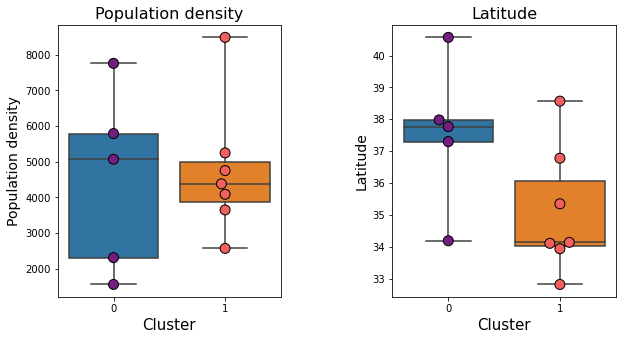

In [78]:
figu, exs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plt.subplots_adjust(wspace = 0.5)

x= "Cluster Labels"
y= ["Population density","Latitude"]

for i in range(0,2):
    ex=sns.boxplot(x="Cluster Labels", y=y[i], data=california_merged, whis=np.inf, ax=exs[i])
    ex=sns.swarmplot(x="Cluster Labels", y=y[i], data=california_merged, palette='magma', size= 10, edgecolor='black', linewidth=1, ax=exs[i])
    ex.set_ylabel('{}'.format(y[i]), size=14)
    ex.set_xlabel('Cluster', size=15)
    ex.set_title(y[i], size=16)

Statistics

In [79]:
from scipy.stats import ttest_ind


cat1 = california_merged[california_merged['Cluster Labels']==0]
cat2 = california_merged[california_merged['Cluster Labels']==1]

test1=ttest_ind(cat1['Latitude'], cat2['Latitude'])
test2=ttest_ind(cat1['Population density'], cat2['Population density'])


print('Latitude mean differences between the two groups were analyzed with a t-student (indep) test, and the p value obtained was {}'.format(test1[1])
,'\n\nPopulation density mean differences between the two groups were analyzed with a t-student (indep) test, and the p value obtained was {}'.format(test2[1]))

Latitude mean differences between the two groups were analyzed with a t-student (indep) test, and the p value obtained was 0.07319362084644937 

Population density mean differences between the two groups were analyzed with a t-student (indep) test, and the p value obtained was 0.8524483530270353


##### _Cluster characterization indicated that population density is similar between the two clusters, and that cities clustered in group "0" show higher lalitudes in comparison to cities in cluster "1"._

#### 2- Air quality was analyzed  <span style="text-decoration: underline">within each cluster</span> , and colour-coded markers were used in order to visualize if there was a relation between air quality and population density 

/Users/FR/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/Users/FR/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1196: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
/Users/FR/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/Users/FR/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1196: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']


Text(0.5, 1.0, 'Population\n density')

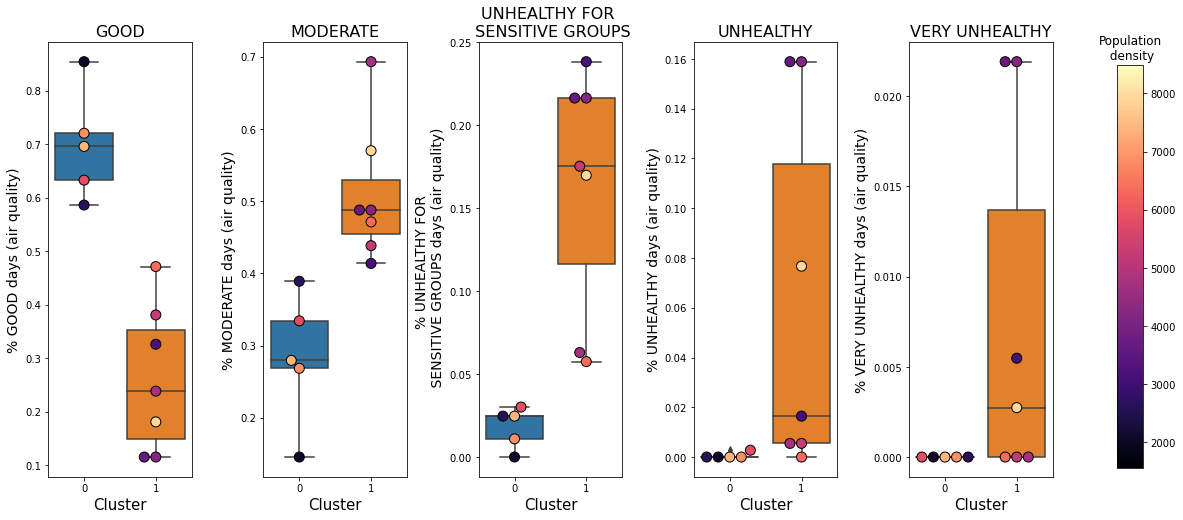

In [80]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(18, 8))
plt.subplots_adjust(wspace = 0.5)

x= "Cluster Labels"
y= ["G%","M%","USG%","U%","VU%"]
z=['GOOD','MODERATE','UNHEALTHY FOR \n SENSITIVE GROUPS','UNHEALTHY','VERY UNHEALTHY']


for i in range(0,5):
    ax=sns.boxplot(x="Cluster Labels", y=y[i], data=california_merged, whis=np.inf, ax=axs[i])
    ax=sns.swarmplot(x="Cluster Labels", y=y[i], data=california_merged, hue="Population density", palette='magma', size= 10, edgecolor='black', linewidth=1, ax=axs[i])
    ax.set_ylabel('% {} days (air quality)'.format(z[i]), size=14)
    ax.set_xlabel('Cluster', size=15)
    ax.set_title(z[i], size=16)
    ax.get_legend().remove()
    
norm = plt.Normalize(california_merged['Population density'].min(),california_merged['Population density'].max())
sm = plt.cm.ScalarMappable(cmap="magma", norm=norm)
sm.set_array([])
cax = fig.add_axes([0.95, 0.14, 0.02, .7])
cbar = ax.figure.colorbar(sm, cax=cax)
cbar.ax.set_title("Population\n density")
 

This results indicate that cluster "0" has more percentaje of GOOD days, and less percentaje of MODERATE/UNHEALTHY FOR SENSITIVE GROUPS/UNHEALTHY OR VERY UNHEALTHY days, compared to cluster "1". Overall, cluster "0" seems to have less air pollution than the other cluster.

Colour-coded markers were used for each value in the boxplots, where yellow indicated high population density cities and black indicated low population density cities. No clear correlation was observed between air quality and population density in neither of the clusters, for all the air quality categories that were analyzed.

#### 3- Venues categories in each cluster

As mentioned before, there is a discrete number of venues categories in the dataset

In [81]:
print('There are {} uniques categories.'.format(len(California_venues['Venue Category'].unique())))

There are 76 uniques categories.


A detailed description of each of those categories can be found here:

In [82]:
V=list(set(Venues.copy()))
#len(V) #80
V

['Optical Shop',
 'Video Store',
 'Steakhouse',
 'Italian Restaurant',
 'Nightclub',
 'Dance Studio',
 'Juice Bar',
 'Hotel',
 'Movie Theater',
 'Pharmacy',
 'Pub',
 'Café',
 'Bank',
 'Chinese Restaurant',
 'Cycle Studio',
 'Lounge',
 'Gym / Fitness Center',
 'Mexican Restaurant',
 'Storage Facility',
 'American Restaurant',
 'Furniture / Home Store',
 'Trail',
 'Gas Station',
 'Automotive Shop',
 'Japanese Restaurant',
 'Plaza',
 'Bowling Alley',
 'Hot Dog Joint',
 'Sports Bar',
 'Mobile Phone Shop',
 'Rental Car Location',
 'Dessert Shop',
 'Burrito Place',
 'Intersection',
 'Deli / Bodega',
 'Convenience Store',
 'Thai Restaurant',
 'Cosmetics Shop',
 'Donut Shop',
 'Diner',
 'Burger Joint',
 'Playground',
 'State / Provincial Park',
 'Vegetarian / Vegan Restaurant',
 'Skate Park',
 'Comic Shop',
 'Gymnastics Gym',
 'Pizza Place',
 'Modern European Restaurant',
 'Concert Hall',
 'Health & Beauty Service',
 'Hardware Store',
 'Salon / Barbershop',
 'Cajun / Creole Restaurant',
 'Viet

It is clear that there are different kinds of restaurants which could be grouped in a higher-order category, such as "RESTAURANT". The same happens for other categories. Thereafter, we build new "general" categories (simplifies cluster data characteristics visualization). 

In [83]:
#New categories
restaurant=[]
coffee=[]
park=[]
beauty_and_health=[]
sports=[]
entertainment=[]
shops=[]
night_life=[]
services=[]
others=[]

#Words in previous venues categories names that will be used for grouping (with this code, it was
#neccesary to check that each venue category was grouped in just one higher-order new category)
matches_r =['Restaurant' , 'Pizza' , 'Hot Dog', 'Diner', 'Burger', 'Fried', 'Sandwich', 'Steakhouse']
matches_c =['Breakfast' , 'Donut' , 'Coffee' , 'Café', 'Juice', 'Dessert', 'Bakery']
matches_p =['Park']
matches_bh =['Cosmetics' , 'Massage' , 'Health', 'Salon']
matches_e =['Movie' , 'Concert', 'Music']
matches_sp =['Gym' , 'Athletics', 'Swim', 'Dance', 'Trail']
matches_sh =['Store', 'Market', 'Mobile', 'Mall', 'Automotive', 'Shop & Service','Sporting', 'Comic']
matches_sv =['Office', 'Rental', 'Facility', 'Gas Station', 'Pharmacy', 'Bank', 'Hotel']
matches_nl =['pub', 'Night']

#Code for grouping. If a given venue category name matches any of the names corresponding to the new 
#higher-order category, then it is added to that list
for i in range(len(V)-1):
    for substring in matches_r:
        if substring in V[i]:
            restaurant.append(V[i])
    for substring in matches_c:
        if substring in V[i]:
            coffee.append(V[i])
    for substring in matches_p:
        if substring in V[i]:
            park.append(V[i])
    for substring in matches_bh:
        if substring in V[i]:
            beauty_and_health.append(V[i])
    for substring in matches_e:
        if substring in V[i]:
            entertainment.append(V[i])
    for substring in matches_sp:
        if substring in V[i]:
            sports.append(V[i])
    for substring in matches_sh:
        if substring in V[i]:
            shops.append(V[i])
    for substring in matches_sv:
        if substring in V[i]:
            services.append(V[i])
    for substring in matches_nl:
        if substring in V[i]:
            night_life.append(V[i])
            
#"others" new category is built by substraction (remaining category names not assigned to any new cat.)
#----
biggerlist=[]

for i in restaurant:
    biggerlist.append(i)
for i in coffee:
    biggerlist.append(i)
for i in park:
    biggerlist.append(i)
for i in beauty_and_health:
    biggerlist.append(i)
for i in entertainment:
    biggerlist.append(i)
for i in sports:
    biggerlist.append(i)
for i in shops:
    biggerlist.append(i)
for i in services:
    biggerlist.append(i)
for i in night_life:
    biggerlist.append(i)
for j in biggerlist:
    for i in V:
        if j == i:
            V.remove(i)
for i in V:
    others.append(i)


In [84]:
# This is the dataframe containing the cluster labels, city names, and all venues category names (which are
#going to be regrouped/recategorized)
new_cat=cal_grouped.copy()
new_cat.insert(0, 'Cluster Labels', kmeans.labels_)
new_cat.head()

,Cluster Labels,City,American Restaurant,Athletics & Sports,Automotive Shop,Bank,Bar,Boutique,Bowling Alley,Breakfast Spot,...,State / Provincial Park,Steakhouse,Storage Facility,Sushi Restaurant,Thai Restaurant,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Yoga Studio
0,1,Bakersfield,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
1,1,Fresno,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.050000,...,0.0,0.05,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
2,1,Los Angeles,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.00,0.000000,0.000000,0.000000,0.5,0.000000,0.0,0.0,0.000000
3,0,Oakland,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.00,0.000000,0.000000,0.055556,0.0,0.055556,0.0,0.0,0.055556
4,0,Redding,0.133333,0.0,0.066667,0.0,0.0,0.0,0.0,0.066667,...,0.0,0.00,0.066667,0.066667,0.000000,0.0,0.000000,0.0,0.0,0.000000


create a DF containing grouped-category data for each city

In [85]:
NC=new_cat.transpose() # transpose dataframe in order to select rows with .loc

# intermediate dataframes, each with data of all the venue categories in the high-order category 
#(eg: restaurant)
NC_R=NC.loc[restaurant]
NC_C=NC.loc[coffee]
NC_BH=NC.loc[beauty_and_health]
NC_SP=NC.loc[sports]
NC_E=NC.loc[entertainment]
NC_SH=NC.loc[shops]
NC_NL=NC.loc[night_life]
NC_SV=NC.loc[services]
NC_O=NC.loc[others]
NC_P=NC.loc[park]

# For each intermediate dataframe, sum the values of rows for each column, and create new row with this data
#(eg: 'Restaurant'). A new row named 'Restaurant' will be added to the dataframe, and will contain the total
# sum for each city (that since the dataframe was transposed, cities are columns)
NC_R.loc['Restaurant',:]= NC_R.sum(axis=0)
NC_C.loc['Coffee',:]= NC_C.sum(axis=0)
NC_BH.loc['Beauty &\n Health',:]= NC_BH.sum(axis=0)
NC_SP.loc['Sports',:]= NC_SP.sum(axis=0)
NC_E.loc['Entertainment',:]= NC_E.sum(axis=0)
NC_SH.loc['Shops',:]= NC_SH.sum(axis=0)
NC_NL.loc['Night Life',:]= NC_NL.sum(axis=0)
NC_SV.loc['Services',:]= NC_SV.sum(axis=0)
NC_O.loc['Others',:]= NC_O.sum(axis=0)
NC_P.loc['Park_',:]= NC_P.sum(axis=0)

# select (for each intermediate df: 'Restaurant',''Coffee', etc), the row that contains data which is a sum 
#of all the similar categories (the total sum of each column)
# all these are series type
R=NC_R.loc['Restaurant']
C=NC_C.loc['Coffee']
BH=NC_BH.loc['Beauty &\n Health']
SP=NC_SP.loc['Sports']
E=NC_E.loc['Entertainment']
SH=NC_SH.loc['Shops']
NL=NC_NL.loc['Night Life']
SV=NC_SV.loc['Services']
O=NC_O.loc['Others']
P=NC_P.loc['Park_']

# concatenate results (for each high-order category) to the df containing cluster labels and city names
result = pd.concat([new_cat, R, C, BH, SP, E, SH, NL, SV, O, P], axis=1)
result=result[['Cluster Labels','Restaurant','Coffee','Park_','Beauty &\n Health', 'Sports', 'Entertainment', 'Shops', 'Night Life', 'Services', 'Others']]
result

#check=result[['Restaurant','Coffee','Park','Beauty_and_Health', 'Sports', 'Entertainment', 'Shops', 'Night Life', 'Services', 'Others']]
#chec=check.sum(axis=1)
#LEN=len(restaurant)+len(others)+len(sports)+len(coffee)+len(park)+len(beauty_and_health)+len(entertainment)+len(shops)+len(night_life)+len(services)


,Cluster Labels,Restaurant,Coffee,Park_,Beauty &\n Health,Sports,Entertainment,Shops,Night Life,Services,Others
0,1,0.75,0,0,0.25,0,0,0,0,0,0
1,1,0.55,0.15,0,0.05,0,0.05,0.2,0,0,0
2,1,0,0,0,0,0.5,0,0,0,0,0.5
3,0,0.388889,0.111111,0,0,0.111111,0,0.166667,0,0.0555556,0.166667
4,0,0.466667,0.133333,0,0,0,0,0.0666667,0,0.2,0.133333
5,1,0,0,0,0,0,0,1,0,0,0
6,1,0.44186,0.139535,0.0465116,0.0465116,0.0232558,0.0232558,0.0465116,0.0465116,0.0697674,0.116279
7,1,0.8,0,0,0,0,0,0.2,0,0,0
8,1,0.25,0,0,0,0.25,0,0.25,0,0,0.25
9,0,0.25,0,0,0,0.25,0,0.25,0,0,0.25


Analysis of venues categories proportion in each cluster

Text(0.5, 0, 'CATEGORY')

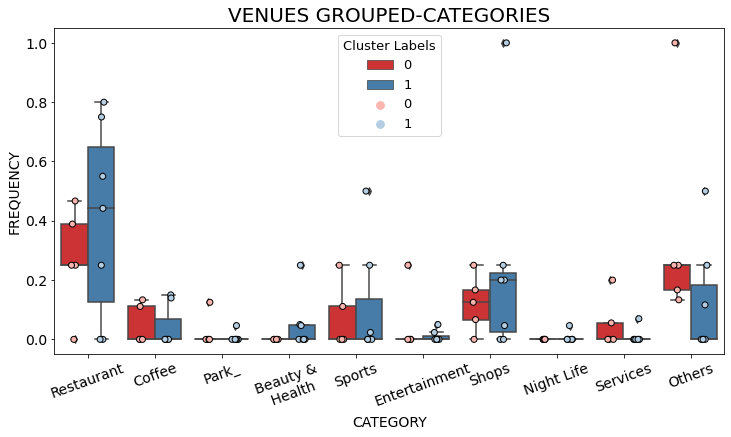

In [86]:
#GRAPH STYLING
SMALL_SIZE = 13
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize


#PLOT GRAPH
fig, ax = plt.subplots(figsize=(12,6)) #size

df_long = pd.melt(result, "Cluster Labels", var_name="Category", value_name="%")

j=sns.boxplot(x="Category", y="%", hue="Cluster Labels", data=df_long, palette="Set1") #boxplot
s=sns.stripplot(x="Category", y="%", hue="Cluster Labels", data=df_long,dodge=True, size= 6, edgecolor='black',palette="Pastel1",linewidth=1)#stripplot (to see individual vlues)
plt.setp(j.get_xticklabels(), rotation=20) #rotate xtick labels

# set title and axis labels
j.set_title('VENUES GROUPED-CATEGORIES', fontsize=20)
j.set_ylabel('FREQUENCY')
j.set_xlabel('CATEGORY')

Overall, no big differences were observed between clusters when the different high-order categories were analyzed. Cluster 0 showed more *shops* than cluster 1. More data should be considered if this analysis were repeated for statistical analysis.

# Number of parks correlation to Air Quality data, within each cluster
The idea behind this analysis was to determine if there was a correlation between either of the clusters air quality data and the number of parks. Nonetheless, it seems that the parks data obtained from Foursquare (at least with this user version) does not thoroughly explore "real" data, as 0 parks were obtained for all the cities except for Sacramento (_there was also a venue that belonged to 'park' in cluster 1, but this was a 'Skate park' and was therefore dismissed_)

** **IN CONCLUSION: No further analysis related to parks could be performed.**
__________________


---------
# RESULTS:

_**The objective of this project was to analyze California cities contamination and determine whether the percentaje of parks (relative to all venues in each city) within each cluster had a relation with the air quality data. If that had been the case, then it would be worthwile studying whether parks construction might be a good alternative to mitigate contamination**_

Firstly, data was collected from different sources and briefly analyzed. 
It was expected that population density could be an indirect indicator of poor air quality in the different Californian cities, as it might be correlated to increased transit, vehicles, etc.
Contrary to what it was speculated, **<span style="text-decoration: underline">there was no clear correlation between population density and air quality in neither of the air quality categories. </span>** For that reason, population density was excluded from the clustering analysis. 

**<span style="text-decoration: underline">k-means clustering was used to group cities according to their air quality data </span>** (a k value of 2 was determined by the elbow method), and cities from each cluster were superimposed on the California state map.

Cluster characterization demonstrated that **<span style="text-decoration: underline">the mean population density between each cluster was similar.</span>**

Despite differences were not statistically different, **<span style="text-decoration: underline">the mean latitude for cities in cluser 0 was higher than the mean latitude from cluster 1.</span>**

Air quality data included the number of days with good(G), moderate(M), Unhealthy for sensitive groups(USG), unhealthy(U) or very unhealthy(VU) categories of air quality. It was expressed as the percentaje of days each city had, in each of these categories.
This information was plotted as boxplots, and our results clearly indicated that **<span style="text-decoration: underline">cluster "0" had less overall contamination than cluster "1".</span>**
Additionally, colour-coded markers were used for each value in the boxplots, where yellow indicated high population density cities and black indicated low population density cities. **<span style="text-decoration: underline">No clear correlation was observed between air quality and population density in neither of the categories of each cluster.</span>**

In order to compare venues characteristics in each cluster, higher-order categories were created. As an example: 'Mexican Restaurant' - 'Sushi Restaurant'- 'Chinese Restaurant'- 'Moroccan Restaurant', etc were included in a new 'RESTAURANT' category. 
As a consequence, **<span style="text-decoration: underline">venues data from each city was recategorized into 10 categories</span>** (instead of 80 different, which were the ones originally present in our Fourthsquare data).
**<span style="text-decoration: underline">Venues high-order categories comparison between each cluster indicated that both clusters were similar,</span>** except for 'SHOPS', as cluster 0 had a higher proportion of venues in this category than cluster 1.

Finally, since the idea behind this analysis was to determine if there was a correlation between either of the clusters air quality data and the number of parks, 'PARKS' high-order category was analyzed. 
Unfortunately, it seems that the **<span style="text-decoration: underline">parks data obtained from Foursquare</span>** (at least with this user version) **<span style="text-decoration: underline">does not thoroughly explore "real" data, as 0 parks were obtained for all the cities except for Sacramento</span>** (there was also a venue that belonged to 'park' in cluster 1, but this was a 'Skate park' and was therefore dismissed). In this respect, **<span style="text-decoration: underline">no further analysis could be performed.</span>**

# DISCUSSION and CONCLUSION:

Our analysis allowed the identification of 2 clusters which differed mainly in the extent of air pollution. Cities in cluster 0, which are mainly located at higher latitudes than cities in cluster1, have a higher proportion of 'Good' air quality days. Population density was a factor that did not seem to affect air quality, and venues charateristics were similar for both clusters.

Unfortunately, the number (or proportion) of parks in each cluster and its relation to air quality could not be studied in the present analysis due to insufficient data.
It would be worthwhile to perform a more detailed analysis in the future with a larger set of Californian cities.


________________




* **<span style="text-decoration: underline">References</span>**

[1] https://www.epa.gov/outdoor-air-quality-data/air-quality-index-report

[2] California State University (CSU) Chancellor's Office. (2017, June 19). California named state with the worst air quality (again). ScienceDaily. Retrieved January 4, 2021 from www.sciencedaily.com/releases/2017/06/170619092749.htm

[3] https://en.wikipedia.org/wiki/Pollution_in_California

[4] Genc S, Zadeoglulari Z, Fuss SH, Genc K. The adverse effects of air pollution on the nervous system. J Toxicol. 2012;2012:782462. doi:10.1155/2012/782462

[5] Holgate ST. 'Every breath we take: the lifelong impact of air pollution' - a call for action. Clin Med (Lond). 2017 Feb;17(1):8-12. doi: 10.7861/clinmedicine.17-1-8. PMID: 28148571; PMCID: PMC6297602.

[6] https://www.niehs.nih.gov/health/topics/agents/air-pollution/index.cfm

[7] Zhao S, Liu S, Hou X, Sun Y, Beazley R. Air pollution and cause-specific mortality: A comparative study of urban and rural areas in China. Chemosphere. 2021 Jan;262:127884. doi: 10.1016/j.chemosphere.2020.127884. Epub 2020 Aug 11. PMID: 33182102.

[8] Borck, Rainald; Schrauth, Philipp (2020). Population density and urban air quality. Regional Science and Urban Economics, (), 103596–. doi:10.1016/j.regsciurbeco.2020.103596 

[9] https://en.wikipedia.org/wiki/List_of_largest_California_cities_by_population

[10] https://en.wikipedia.org/wiki/List_of_largest_California_cities_by_land_area

[11] www.kaggle.com/camnugent/california-housing-feature-engineering?select=cal_cities_lat_long.csv

